In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt


from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
churn_df = pd.read_csv("train.csv")
churn_df.head()

,area,perimeter,major_axis,minor_axis,eccentricity,eqdiasq,solidity,convex_area,extent,aspect_ratio,roundness,compactness,shapefactor_1,shapefactor_2,shapefactor_3,shapefactor_4,target
0,75516,1731.4840,411.7352,245.7620,0.8023,310.0806,0.9148,82546,0.7169,1.6753,0.3165,0.7531,0.0055,0.0033,0.5672,0.9502,1
1,98903,1374.4370,477.2451,269.7676,0.8249,354.8622,0.9585,103181,0.7679,1.7691,0.6579,0.7436,0.0048,0.0027,0.5529,0.9781,0
2,84746,1311.1570,482.7735,235.9040,0.8725,328.4843,0.9121,92914,0.7162,2.0465,0.6195,0.6804,0.0057,0.0028,0.4630,0.9474,1
3,98184,1463.1680,434.3769,292.6472,0.7390,353.5700,0.9543,102890,0.7316,1.4843,0.5763,0.8140,0.0044,0.0030,0.6625,0.9834,0
4,94170,1267.7271,440.1109,278.4162,0.7745,346.2672,0.9643,97656,0.6836,1.5808,0.7363,0.7868,0.0047,0.0030,0.6190,0.9785,0


In [3]:
churn_df = churn_df[['area','perimeter','major_axis','minor_axis','eccentricity','eqdiasq','solidity','convex_area','extent','aspect_ratio','roundness','compactness','shapefactor_1','shapefactor_2','shapefactor_3','shapefactor_4', 'target']]
churn_df['target'] = churn_df['target'].astype('int')
churn_df.head()

,area,perimeter,major_axis,minor_axis,eccentricity,eqdiasq,solidity,convex_area,extent,aspect_ratio,roundness,compactness,shapefactor_1,shapefactor_2,shapefactor_3,shapefactor_4,target
0,75516,1731.4840,411.7352,245.7620,0.8023,310.0806,0.9148,82546,0.7169,1.6753,0.3165,0.7531,0.0055,0.0033,0.5672,0.9502,1
1,98903,1374.4370,477.2451,269.7676,0.8249,354.8622,0.9585,103181,0.7679,1.7691,0.6579,0.7436,0.0048,0.0027,0.5529,0.9781,0
2,84746,1311.1570,482.7735,235.9040,0.8725,328.4843,0.9121,92914,0.7162,2.0465,0.6195,0.6804,0.0057,0.0028,0.4630,0.9474,1
3,98184,1463.1680,434.3769,292.6472,0.7390,353.5700,0.9543,102890,0.7316,1.4843,0.5763,0.8140,0.0044,0.0030,0.6625,0.9834,0
4,94170,1267.7271,440.1109,278.4162,0.7745,346.2672,0.9643,97656,0.6836,1.5808,0.7363,0.7868,0.0047,0.0030,0.6190,0.9785,0


In [4]:
X = np.asarray(churn_df[['area','perimeter','major_axis','minor_axis','eccentricity','eqdiasq','solidity','convex_area','extent','aspect_ratio','roundness','compactness','shapefactor_1','shapefactor_2','shapefactor_3','shapefactor_4']])
X[0:5]

array([[7.5516000e+04, 1.7314840e+03, 4.1173520e+02, 2.4576200e+02,
        8.0230000e-01, 3.1008060e+02, 9.1480000e-01, 8.2546000e+04,
        7.1690000e-01, 1.6753000e+00, 3.1650000e-01, 7.5310000e-01,
        5.5000000e-03, 3.3000000e-03, 5.6720000e-01, 9.5020000e-01],
       [9.8903000e+04, 1.3744370e+03, 4.7724510e+02, 2.6976760e+02,
        8.2490000e-01, 3.5486220e+02, 9.5850000e-01, 1.0318100e+05,
        7.6790000e-01, 1.7691000e+00, 6.5790000e-01, 7.4360000e-01,
        4.8000000e-03, 2.7000000e-03, 5.5290000e-01, 9.7810000e-01],
       [8.4746000e+04, 1.3111570e+03, 4.8277350e+02, 2.3590400e+02,
        8.7250000e-01, 3.2848430e+02, 9.1210000e-01, 9.2914000e+04,
        7.1620000e-01, 2.0465000e+00, 6.1950000e-01, 6.8040000e-01,
        5.7000000e-03, 2.8000000e-03, 4.6300000e-01, 9.4740000e-01],
       [9.8184000e+04, 1.4631680e+03, 4.3437690e+02, 2.9264720e+02,
        7.3900000e-01, 3.5357000e+02, 9.5430000e-01, 1.0289000e+05,
        7.3160000e-01, 1.4843000e+00, 5.76300

In [5]:
y = np.asarray(churn_df['target'])
y [0:5]

array([1, 0, 1, 0, 0])

In [6]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]


array([[-0.36294225,  0.821283  , -1.09187648,  0.22982875, -0.7640195 ,
        -0.32003741, -0.52719821, -0.20906992,  0.0233671 , -0.92621763,
        -1.20797964,  0.91180904, -0.24109268,  0.86891391,  0.89846974,
        -0.10369869],
       [ 1.45198536, -0.13279175,  0.9517401 ,  1.02797768, -0.30343024,
         1.38971072,  0.37112729,  1.37383623,  1.01154584, -0.53165743,
         0.41284111,  0.69270527, -1.17400751, -0.94153815,  0.66963205,
         0.44605245],
       [ 0.3533438 , -0.30188392,  1.12420151, -0.09793445,  0.66666043,
         0.38261036, -0.58270116,  0.586257  ,  0.00980386,  0.63519754,
         0.23053438, -0.76491139,  0.02545442, -0.63979614, -0.76900494,
        -0.15887085],
       [ 1.39618799,  0.1043087 , -0.38555646,  1.78868886, -2.05407704,
         1.34037491,  0.28478937,  1.35151369,  0.30819509, -1.72963976,
         0.02543931,  2.31637953, -1.7071017 , -0.03631212,  2.42352096,
         0.55048546],
       [ 1.08468505, -0.4179341 , -0

In [7]:
# Import the necessary sklearn method
from sklearn.preprocessing import MinMaxScaler
# Instantiate a Min-Max scaling object
mm = MinMaxScaler()# Fit and transform our feature data into a pandas dataframe
X = pd.DataFrame(mm.fit_transform(X))

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.1, random_state=33)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1159, 16) (1159,)
Test set: (129, 16) (129,)


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(fit_intercept = False, C=1e12, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

In [10]:
yhat = LR.predict(X_test)
yhat

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1])

In [11]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[3.03321872e-01, 6.96678128e-01],
       [3.40186866e-01, 6.59813134e-01],
       [1.22084196e-02, 9.87791580e-01],
       [1.86538330e-02, 9.81346167e-01],
       [1.27040719e-02, 9.87295928e-01],
       [9.62131256e-01, 3.78687445e-02],
       [1.43023063e-03, 9.98569769e-01],
       [1.32995981e-02, 9.86700402e-01],
       [3.65310104e-01, 6.34689896e-01],
       [8.41507731e-01, 1.58492269e-01],
       [9.99882853e-01, 1.17146718e-04],
       [1.11793576e-01, 8.88206424e-01],
       [1.96460008e-02, 9.80353999e-01],
       [3.85325786e-01, 6.14674214e-01],
       [1.41173423e-01, 8.58826577e-01],
       [8.96079590e-01, 1.03920410e-01],
       [9.96952037e-01, 3.04796306e-03],
       [9.03056340e-02, 9.09694366e-01],
       [1.43464072e-01, 8.56535928e-01],
       [8.17772766e-01, 1.82227234e-01],
       [2.81359210e-02, 9.71864079e-01],
       [1.30376439e-01, 8.69623561e-01],
       [4.39867187e-01, 5.60132813e-01],
       [8.31341062e-01, 1.68658938e-01],
       [4.170275

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.001, solver='newton-cg').fit(X_train,y_train)
LR
yhat = LR.predict(X_test)
yhat
yhat_prob = LR.predict_proba(X_test)
yhat_prob
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.663026440916144

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
LR2 = LogisticRegression(C=0.001, solver='sag').fit(X_train,y_train)
yhat = LR2.predict(X_test)
yhat
yhat_prob2 = LR2.predict_proba(X_test)
print ("LogLoss: : %.2f" % log_loss(y_test, yhat_prob2))

LogLoss: : 0.66


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
LR2 = LogisticRegression(C=0.001, solver='lbfgs').fit(X_train,y_train)
yhat = LR2.predict(X_test)
yhat
yhat_prob3 = LR2.predict_proba(X_test)
print ("LogLoss: : %.2f" % log_loss(y_test, yhat_prob3))

LogLoss: : 0.66


In [15]:
rf = RandomForestClassifier(n_estimators=200, max_depth=1000,
                              random_state=42)
rf.fit(X_train, y_train) 
score = rf.score(X_train, y_train)
score2 = rf.score(X_test, y_test)
yhat = rf.predict(X_test)
yhat
print("Training set accuracy: ", '%.3f'%(score))
print("Test set accuracy: ", '%.3f'%(score2))

Training set accuracy:  1.000
Test set accuracy:  0.876


In [16]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=1, max_iter=500, activation="logistic", solver='adam', hidden_layer_sizes=(50, 500, 100))
mlp.fit(X_train, y_train)
score = mlp.score(X_train, y_train)
score2 = mlp.score(X_test, y_test)
yhat = mlp.predict(X_test)
yhat
print("Training set accuracy: ", '%.3f'%(score))
print("Test set accuracy: ", '%.3f'%(score2))

Training set accuracy:  0.850
Test set accuracy:  0.884


In [17]:
from sklearn.tree import DecisionTreeClassifier
dtf = DecisionTreeClassifier(criterion="log_loss", max_depth = 500)
dtf.fit(X_train, y_train)
score = dtf.score(X_train, y_train)
score2 = dtf.score(X_test, y_test)
yhat = dtf.predict(X_test)
yhat
print("Training set accuracy: ", '%.3f'%(score))
print("Test set accuracy: ", '%.3f'%(score2))

Training set accuracy:  1.000
Test set accuracy:  0.822


In [18]:
from sklearn.tree import ExtraTreeClassifier
etf = ExtraTreeClassifier()
etf.fit(X_train, y_train)
score = etf.score(X_train, y_train)
score2 = etf.score(X_test, y_test)
yhat = etf.predict(X_test)
yhat
print("Training set accuracy: ", '%.3f'%(score))
print("Test set accuracy: ", '%.3f'%(score2))

Training set accuracy:  1.000
Test set accuracy:  0.791


In [19]:
from sklearn.ensemble import AdaBoostClassifier
atf = AdaBoostClassifier(n_estimators=90)                  
atf.fit(X_train, y_train)
score = atf.score(X_train, y_train)
score2 = atf.score(X_test, y_test)
yhat = atf.predict(X_test)
yhat
print("Training set accuracy: ", '%.3f'%(score))
print("Test set accuracy: ", '%.3f'%(score2))

Training set accuracy:  0.918
Test set accuracy:  0.853


In [20]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import numpy as np
qtf = QuadraticDiscriminantAnalysis()
qtf.fit(X_train, y_train)
score = qtf.score(X_train, y_train)
score2 = qtf.score(X_test, y_test)
yhat = qtf.predict(X_test)
yhat
print("Training set accuracy: ", '%.3f'%(score))
print("Test set accuracy: ", '%.3f'%(score2))

Training set accuracy:  0.871
Test set accuracy:  0.899


In [21]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline 
from sklearn.ensemble import StackingClassifier

estimators = [('rf', RandomForestClassifier(n_estimators=100, random_state=42)),('svr', make_pipeline(StandardScaler(),LinearSVC(dual="auto", random_state=42)))]
clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
clf.fit(X_train, y_train)
score = clf.score(X_train, y_train)
score2 = clf.score(X_test, y_test)
yhat = clf.predict(X_test)
yhat
print("Training set accuracy: ", '%.3f'%(score))
print("Test set accuracy: ", '%.3f'%(score2))

Training set accuracy:  0.944
Test set accuracy:  0.884


In [22]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np
ltf = LinearDiscriminantAnalysis()
ltf.fit(X_train, y_train)
score = ltf.score(X_train, y_train)
score2 = ltf.score(X_test, y_test)
yhat = ltf.predict(X_test)
yhat
print("Training set accuracy: ", '%.3f'%(score))
print("Test set accuracy: ", '%.3f'%(score2))

Training set accuracy:  0.866
Test set accuracy:  0.876


In [23]:
#svm
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
slf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
slf.fit(X_train, y_train)
score = ltf.score(X_train, y_train)
score2 = ltf.score(X_test, y_test)
yhat = ltf.predict(X_test)
yhat
print("Training set accuracy: ", '%.3f'%(score))
print("Test set accuracy: ", '%.3f'%(score2))

Training set accuracy:  0.866
Test set accuracy:  0.876


In [24]:
from sklearn.ensemble import GradientBoostingClassifier
gbr = GradientBoostingClassifier(n_estimators=400, max_depth=1, learning_rate=0.01)
gbr.fit(X_train, y_train)
score = gbr.score(X_train, y_train)
score2 = gbr.score(X_test, y_test)
yhat = gbr.predict(X_test)
yhat
print("Training set accuracy: ", '%.3f'%(score))
print("Test set accuracy: ", '%.3f'%(score2))

Training set accuracy:  0.871
Test set accuracy:  0.845


In [27]:
from catboost import CatBoostClassifier


model = CatBoostClassifier(iterations=15000,
                           task_type="GPU",
                           loss_function="Logloss",
                           devices='0:1')
model.fit(X_train, y_train)
score = model.score(X_train, y_train)
score2 = model.score(X_test, y_test)
yhat = model.predict(X_test)
yhat
print("Training set accuracy: ", '%.3f'%(score))
print("Test set accuracy: ", '%.3f'%(score2))

Learning rate set to 0.002954
0:	learn: 0.6902872	total: 82.8ms	remaining: 20m 41s
1:	learn: 0.6872411	total: 124ms	remaining: 15m 30s
2:	learn: 0.6844587	total: 159ms	remaining: 13m 16s
3:	learn: 0.6815959	total: 193ms	remaining: 12m 5s
4:	learn: 0.6790441	total: 224ms	remaining: 11m 10s
5:	learn: 0.6761467	total: 255ms	remaining: 10m 36s
6:	learn: 0.6732558	total: 285ms	remaining: 10m 9s
7:	learn: 0.6705395	total: 322ms	remaining: 10m 3s
8:	learn: 0.6680046	total: 359ms	remaining: 9m 57s
9:	learn: 0.6650549	total: 389ms	remaining: 9m 43s
10:	learn: 0.6625852	total: 426ms	remaining: 9m 40s
11:	learn: 0.6598247	total: 461ms	remaining: 9m 36s
12:	learn: 0.6572606	total: 493ms	remaining: 9m 28s
13:	learn: 0.6545092	total: 527ms	remaining: 9m 23s
14:	learn: 0.6518223	total: 555ms	remaining: 9m 14s
15:	learn: 0.6491005	total: 587ms	remaining: 9m 9s
16:	learn: 0.6466036	total: 619ms	remaining: 9m 5s
17:	learn: 0.6439739	total: 649ms	remaining: 9m
18:	learn: 0.6412733	total: 680ms	remaining:

In [34]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
eclf1 = VotingClassifier(estimators=[('slf', slf), ('rf', rf), ('ltf', ltf), ('clf', clf),("qtf", qtf), ("atf", atf), ("model", model)], voting='hard')
eclf1.fit(X_train, y_train)
score = eclf1.score(X_train, y_train)
score2 = eclf1.score(X_test, y_test)
yhat = eclf1.predict(X_test)
yhat
print("Training set accuracy: ", '%.3f'%(score))
print("Test set accuracy: ", '%.3f'%(score2))

Learning rate set to 0.007906
0:	learn: 0.6855246	total: 30.9ms	remaining: 2m 34s
1:	learn: 0.6774997	total: 60.1ms	remaining: 2m 30s
2:	learn: 0.6702667	total: 88.8ms	remaining: 2m 27s
3:	learn: 0.6629162	total: 119ms	remaining: 2m 28s
4:	learn: 0.6564592	total: 148ms	remaining: 2m 27s
5:	learn: 0.6491846	total: 174ms	remaining: 2m 24s
6:	learn: 0.6420200	total: 199ms	remaining: 2m 21s
7:	learn: 0.6353683	total: 236ms	remaining: 2m 27s
8:	learn: 0.6290358	total: 265ms	remaining: 2m 26s
9:	learn: 0.6219747	total: 291ms	remaining: 2m 25s
10:	learn: 0.6161727	total: 320ms	remaining: 2m 25s
11:	learn: 0.6097366	total: 347ms	remaining: 2m 24s
12:	learn: 0.6038495	total: 374ms	remaining: 2m 23s
13:	learn: 0.5975630	total: 398ms	remaining: 2m 21s
14:	learn: 0.5915275	total: 428ms	remaining: 2m 22s
15:	learn: 0.5854785	total: 458ms	remaining: 2m 22s
16:	learn: 0.5800386	total: 489ms	remaining: 2m 23s
17:	learn: 0.5743604	total: 524ms	remaining: 2m 25s
18:	learn: 0.5694496	total: 557ms	remaini

In [31]:
from sklearn.naive_bayes import GaussianNB
glf = GaussianNB()
glf.fit(X_train, y_train)
score = glf.score(X_train, y_train)
score2 = glf.score(X_test, y_test)
yhat = glf.predict(X_test)
yhat
print("Training set accuracy: ", '%.3f'%(score))
print("Test set accuracy: ", '%.3f'%(score2))

Training set accuracy:  0.855
Test set accuracy:  0.891


In [32]:
import xgboost as xgb

# Create an XGBoost classifier
xgbf = xgb.XGBClassifier()

# Train the model on the training data
xgbf.fit(X_train, y_train)

score = xgbf.score(X_train, y_train)
score2 = xgbf.score(X_test, y_test)
yhat = xgbf.predict(X_test)
yhat
print("Training set accuracy: ", '%.3f'%(score))
print("Test set accuracy: ", '%.3f'%(score2))

Training set accuracy:  1.000
Test set accuracy:  0.868


In [33]:
from lightgbm import LGBMClassifier

# train_data = lgb.Dataset(X_train, label=y_train)

# Define the parameters for the LightGBM classifier
# params = {
#     'objective': 'multiclass',
#     'num_class': 2,
#     'metric': 'multi_logloss'
# }

# # Train the model on the training data
# model = lgb.train(params, train_data)
lgb = LGBMClassifier(objective="binary", metric="binary_logloss")
# Make predictions on the test data
# y_pred = model.predict(X_test)
# y_pred = y_pred.argmax(axis=1)

# # Calculate the accuracy of the model
# accuracy = (y_pred == y_test).mean()
# print(f'Accuracy: {accuracy:.2f}')
lgb.fit(X_train, y_train)

score = lgb.score(X_train, y_train)
score2 = lgb.score(X_test, y_test)
yhat = lgb.predict(X_test)
yhat
print("Training set accuracy: ", '%.3f'%(score))
print("Test set accuracy: ", '%.3f'%(score2))

[LightGBM] [Info] Number of positive: 662, number of negative: 497
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000218 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3624
[LightGBM] [Info] Number of data points in the train set: 1159, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.571182 -> initscore=0.286676
[LightGBM] [Info] Start training from score 0.286676
Training set accuracy:  1.000
Test set accuracy:  0.860


In [258]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

ImportError: cannot import name 'jaccard_similarity_score' from 'sklearn.metrics' (/home/vadim/anaconda3/envs/fastai/lib/python3.8/site-packages/sklearn/metrics/__init__.py)

In [29]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[69  6]
 [12 42]]


Confusion matrix, without normalization
[[69  6]
 [12 42]]


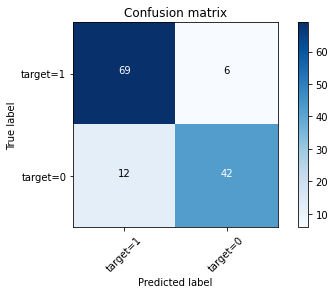

In [30]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['target=1','target=0'],normalize= False,  title='Confusion matrix')

In [31]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.88      0.78      0.82        54
           1       0.85      0.92      0.88        75

    accuracy                           0.86       129
   macro avg       0.86      0.85      0.85       129
weighted avg       0.86      0.86      0.86       129



In [32]:
churn = pd.read_csv("test.csv")

In [33]:
churn = churn[['area','perimeter','major_axis','minor_axis','eccentricity','eqdiasq','solidity','convex_area','extent','aspect_ratio','roundness','compactness','shapefactor_1','shapefactor_2','shapefactor_3','shapefactor_4']]
X = np.asarray(churn[['area','perimeter','major_axis','minor_axis','eccentricity','eqdiasq','solidity','convex_area','extent','aspect_ratio','roundness','compactness','shapefactor_1','shapefactor_2','shapefactor_3','shapefactor_4']])

In [34]:
from sklearn import preprocessing
XX_test = preprocessing.StandardScaler().fit(X).transform(X)

In [35]:
# Import the necessary sklearn method
from sklearn.preprocessing import MinMaxScaler
# Instantiate a Min-Max scaling object
mm = MinMaxScaler()# Fit and transform our feature data into a pandas dataframe
XX_test = pd.DataFrame(mm.fit_transform(X))

In [36]:
df = pd.read_csv("test.csv")

In [37]:
yhat = model.predict(XX_test)

df['target'] = yhat
df.to_csv('answers.csv',index=False)


In [38]:
df.shape

(430, 17)

In [39]:
df["target"].to_csv('answers.csv',index=False)